In [1]:
%pip install numpy
%pip install tensorflow
%pip install keras

You should consider upgrading via the '/home/oss/anaconda3/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the '/home/oss/anaconda3/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the '/home/oss/anaconda3/bin/python3 -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


Importo datos y convierto a dataframe

In [501]:
# Importamos los datos y los convertimos a un DataFrame.

import requests
import json

import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None

if __name__ == '__main__':
    url = 'https://api.mercadolibre.com/sites/MLA/search?q=Bicileta'
    response =requests.get(url)
    
    if response.status_code == 200:
        content = response.content
        data = json.loads(content)
        dato = pd.json_normalize(data['results'])
        df = pd.DataFrame(dato)
        print(df.columns)




Index(['id', 'site_id', 'title', 'price', 'sale_price', 'currency_id',
       'available_quantity', 'sold_quantity', 'buying_mode', 'listing_type_id',
       'stop_time', 'condition', 'permalink', 'thumbnail', 'thumbnail_id',
       'accepts_mercadopago', 'attributes', 'original_price', 'category_id',
       'official_store_id', 'domain_id', 'catalog_product_id', 'tags',
       'order_backend', 'use_thumbnail_id', 'seller.id', 'seller.permalink',
       'seller.registration_date', 'seller.car_dealer',
       'seller.real_estate_agency', 'seller.tags', 'seller.eshop.nick_name',
       'seller.eshop.eshop_rubro', 'seller.eshop.eshop_id',
       'seller.eshop.eshop_locations', 'seller.eshop.site_id',
       'seller.eshop.eshop_logo_url', 'seller.eshop.eshop_status_id',
       'seller.eshop.seller', 'seller.eshop.eshop_experience',
       'seller.seller_reputation.transactions.total',
       'seller.seller_reputation.transactions.canceled',
       'seller.seller_reputation.transactions.per

El motivo por el cual se sueltan estas columnas es debido a distintos motivos: demasiados datos faltantes, sus valores son univariados o bien 

debido a que representa un mensaje.

In [502]:
df = df.drop(['id', 'site_id', 'sale_price', 'currency_id', 'buying_mode', 'stop_time', 'condition', 'permalink', 'thumbnail', 'thumbnail_id',
              'accepts_mercadopago', 'attributes', 'category_id', 'official_store_id', 'domain_id', 'catalog_product_id', 'tags', 'seller.id', 'seller.permalink', 
              'seller.registration_date', 'seller.car_dealer', 'seller.real_estate_agency', 'seller.tags', 'seller.eshop.nick_name',
              'seller.eshop.eshop_rubro', 'seller.eshop.eshop_id', 'seller.eshop.eshop_locations', 'seller.eshop.site_id', 
              'seller.eshop.eshop_logo_url', 'seller.eshop.eshop_status_id', 'seller.eshop.seller', 'seller.eshop.eshop_experience',
              'seller.seller_reputation.transactions.period', 'seller.seller_reputation.metrics.claims.period',  
              'seller.seller_reputation.metrics.delayed_handling_time.value', 'seller.seller_reputation.metrics.delayed_handling_time.period',
              'seller.seller_reputation.metrics.sales.period', 'seller.seller_reputation.metrics.cancellations.period',
              'seller.seller_reputation.level_id', 'prices.id', 'prices.prices', 'prices.presentation.display_currency', 'prices.payment_method_prices',
              'installments.currency_id', 'address.state_id', 'address.state_name', 'address.city_id', 'address.city_name', 'shipping.free_shipping', 
              'shipping.mode', 'shipping.tags', 'shipping.logistic_type', 'shipping.store_pick_up', 'seller_address.id', 'seller_address.comment', 
              'seller_address.address_line', 'seller_address.zip_code', 'seller_address.country.id', 'seller_address.country.name', 'seller_address.state.id',
              'seller_address.state.name', 'seller_address.city.id', 'seller_address.city.name', 'seller_address.latitude', 'seller_address.longitude',
              'differential_pricing.id'], axis=1)

df.head()



,title,price,available_quantity,sold_quantity,listing_type_id,original_price,order_backend,use_thumbnail_id,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,installments.quantity,installments.amount,installments.rate,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.metrics.claims.excluded.real_value,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,seller.seller_reputation.metrics.cancellations.excluded.real_value,seller.seller_reputation.protection_end_date,seller.seller_reputation.real_level
0,Bicicleta Nordic X1.0 By Slp R29 Shim. 21v Dis...,37599.06,50,500,gold_special,39999.0,1,False,120317,6379,0.04,0.93,0.03,113938,platinum,0.0099,171,0.0028,16349,0.0032,55,12,5331.86,70.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bicicleta Mountain Bike Slp 5 R29 21v Shimano ...,50969.00,50,500,gold_pro,73905.0,2,False,10923,773,0.07,0.89,0.04,10150,platinum,0.0094,29,0.0064,2855,0.0081,25,18,2831.61,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bicicleta Mountain Bike Rodado 26 Doble Suspen...,27844.00,1,500,gold_special,40000.0,3,False,88630,5388,0.03,0.95,0.02,83242,platinum,0.0112,145,0.0215,12257,0.0052,68,12,3948.51,70.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bicicleta Mountain Bike Rodado 29 Slp 5 - Camb...,48300.00,1,500,gold_pro,75000.0,4,False,88630,5388,0.03,0.95,0.02,83242,platinum,0.0112,145,0.0215,12257,0.0052,68,18,2683.33,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bicicleta Mtb Slp 5 Pro R29 21v Shimano F.disc...,39207.00,50,150,gold_special,56850.0,5,False,10923,773,0.07,0.89,0.04,10150,platinum,0.0094,29,0.0064,2855,0.0081,25,12,5559.88,70.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convierto columnas categoricas

In [503]:
# Convierto columnas categoricas 
df = pd.get_dummies(df, columns = ['title', 'listing_type_id', 'use_thumbnail_id', 'seller.seller_reputation.power_seller_status'], drop_first = True)

df.head()

,price,available_quantity,sold_quantity,original_price,order_backend,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,installments.quantity,installments.amount,installments.rate,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.metrics.claims.excluded.real_value,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,seller.seller_reputation.metrics.cancellations.excluded.real_value,seller.seller_reputation.protection_end_date,seller.seller_reputation.real_level,title_Bicicleta Con Porta Paseo Rodado 26 Dama Mujer Retro,title_Bicicleta De Paseo Urbana Rodado 26 Futura Country,title_Bicicleta Infantil Cross Liberty Multicolor R12 + Rueditas,title_Bicicleta Infantil Lamborghini Nene Nena Acero Rodado 16,title_Bicicleta Infantil Rodado 20 Lamborghini 7116,title_Bicicleta Infantil Rosa Niña Nena Rodado 12 Love Violeta,title_Bicicleta Mountain Bike Doble Suspencion 21 Vel Rodado 26,title_Bicicleta Mountain Bike Fire Bird Rodado 29-shimano- Oferta!,title_Bicicleta Mountain Bike Futura Lynce Rodado 29 Cambios Envio,title_Bicicleta Mountain Bike R29 Slp 25 21v Shimano F/disc Susp.,title_Bicicleta Mountain Bike Rodado 26 Doble Suspension Forest Cuadro Reforzado Cambios Llantas Varios Colores Happy Buy,title_Bicicleta Mountain Bike Rodado 29 Forest Aluminio Shimano Cambios Frenos Disco Suspension Llanta Doble Varon Mujer Happy,title_Bicicleta Mountain Bike Rodado 29 Slp 10 Shimano Cambios Frenos A Disco Llantas Doble Pared Suspension Varon Mujer Happy,title_Bicicleta Mountain Bike Rodado 29 Slp 10 Shimano Cambios Frenos Disco Llantas Doble Pared Suspension Nuevas Cuotas Happy,title_Bicicleta Mountain Bike Rodado 29 Slp 100 Pro Shimano Cambios Frenos Disco Llantas Doble Pared Suspension Varon Mujer Hb,title_Bicicleta Mountain Bike Rodado 29 Slp 25 Pro Cambios Shimano Frenos A Disco Llanta Doble Pared Suspension Varon Mujer Hb,title_Bicicleta Mountain Bike Rodado 29 Slp 25 Pro Cambios Shimano Frenos Disco Llantas Doble Pared Suspension Hombre Mujer Hb,title_Bicicleta Mountain Bike Rodado 29 Slp 5 - Cambios Shimano Frenos A Disco Llantas Doble Pared Suspension Nueva Happy Buy,title_Bicicleta Mountain Bike Rodado 29 Slp 5 - Cambios Shimano Frenos Disco Llantas Doble Pared Suspension Varon Mujer Happy,title_Bicicleta Mountain Bike Slp 10 R29 21v Shimano F/disc Susp,title_Bicicleta Mountain Bike Slp 25 Pro Lady R. 29 21v Shimano,title_Bicicleta Mountain Bike Slp 5 R29 21v Shimano F/disco Susp.,title_Bicicleta Mountain Bike Slp 50 R29 21v Shimano F.disc Susp.,title_Bicicleta Mtb Kuwara New Onna Dama Rodado 26,title_Bicicleta Mtb Slp 10 Lady Rodado 29 21v Shimano F.disco,title_Bicicleta Mtb Slp 5 Pro R29 21v Shimano F.disco Suspension,title_Bicicleta Mtb Slp 50 Pro R29 Susp Shimano 21v F/disco Susp.,title_Bicicleta Mtb Topmega Regal R29 21v Aluminio + Linga + Led,title_Bicicleta Mtb Topmega Regal R29 21v Disco Mec Aluminio Cuota,title_Bicicleta Mtb Topmega Regal R29 21v Disco Mecanico Aluminio,title_Bicicleta Mtb Topmega Regal Rodado 29 21 Velocidades,title_Bicicleta Nene Rodado 12 Ram,title_Bicicleta Nordic X 3.0 By Slp 21v R29 Alum. Freno Disco +led,title_Bicicleta Nordic X1.0 By Slp R29 21v Disco + 18 Cuotas,title_Bicicleta Nordic X1.0 By Slp R29 Shim. 21v Disco Susp+linga,title_Bicicleta Nordic X1.0 By 

El metodo por el cual se eligen componentes principales a utilizar es empleando una matriz de correlación,

In [504]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corr_xy = pd.DataFrame(corrFilter(df, .60))
corr_xy

0
seller.seller_reputation.transactions.ratings.p... seller.seller_reputation.transactions.ratings.n... -0.980468
                                                   seller.seller_reputation.transactions.ratings.n... -0.922321
installments.quantity                              listing_type_id_gold_special                       -0.711584
seller.seller_reputation.power_seller_status_pl... title_Bicicleta Con Porta Paseo Rodado 26 Dama ... -0.699854
                                                   title_Bicicleta Rodado 20 Cross Bmx Varon          -0.699854
use_thumbnail_id_True                              title_Bicicleta Mtb Kuwara New Onna Dama Rodado 26  0.699854
title_Bicicleta Urbana Plegable Slp 6 Vel Shima... use_thumbnail_id_True                               0.699854
seller.seller_reputation.metrics.delayed_handli... seller.seller_reputation.transactions.completed     0.749022
seller.seller_reputation.transactions.total        seller.seller_reputation.metrics.delayed_handli...  0.752384
seller.seller_reputation.metrics.cancellations.... seller.seller_reputation.metrics.delayed_handli...  0.753062
seller.seller_reputation.metrics.sales.completed   seller.seller_reputation.metrics.delayed_handli...  0.780356
seller.seller_reputation.metrics.delayed_handli... seller.seller_reputation.transactions.canceled      0.799458
seller.seller_reputation.transactions.ratings.n... seller.seller_reputation.transactions.ratings.n...  0.828305
seller.seller_reputation.metrics.delayed_handli... seller.seller_reputation.metrics.claims.value       0.852193
price                                              original_price                                      0.911622
available_quantity                                 title_Bicicleta Slp Max Rodado 16 Varon Bmx Con...  0.916473
seller.seller_reputation.metrics.cancellations.... seller.seller_reputation.metrics.claims.value       0.924076
seller.seller_reputation.transactions.completed    seller.seller_reputation.metrics.cancellations....  0.934075
seller.seller_reputation.metrics.cancellations.... seller.seller_reputation.metrics.sales.completed    0.934377
seller.seller_reputation.transactions.total        seller.seller_reputation.metrics.cancellations....  0.935126
seller.seller_reputation.metrics.cancellations.... seller.seller_reputation.transactions.canceled      0.946518
seller.seller_reputation.metrics.claims.value      seller.seller_reputation.transactions.completed     0.965808
                                                   seller.seller_reputation.transactions.total         0.967256
                                                   seller.seller_reputation.metrics.sales.completed    0.981918
                                                   seller.seller_reputation.transactions.canceled      0.984473
seller.seller_reputation.transactions.completed    seller.seller_reputation.transactions.canceled      0.994920
seller.seller_reputation.transactions.total        seller.seller_reputation.transactions.canceled      0.995531
seller.seller_reputation.metrics.sales.completed   seller.seller_reputation.transactions.completed     0.995556
                                                   seller.seller_reputation.transactions.total         0.995947
seller.seller_reputation.transactions.canceled     seller.seller_reputation.metrics.sales.completed    0.997090
seller.seller_reputation.transactions.total        seller.seller_reputation.transactions.completed     0.999980
installments.rate                                  listing_type_id_gold_special                        1.000000
price                                              price                                                    NaN

Me quedo con las columnas que presentan una correlación mayor a <span style="color: #09885a;">0.60</span>

In [505]:

df = df[['seller.seller_reputation.transactions.ratings.positive', 'seller.seller_reputation.transactions.ratings.neutral', 'sold_quantity',
        'seller.seller_reputation.power_seller_status_platinum', 'installments.quantity', 'seller.seller_reputation.metrics.delayed_handling_time.rate',
        'seller.seller_reputation.transactions.completed', 'seller.seller_reputation.metrics.delayed_handling_time.rate', 'use_thumbnail_id_True',
        'seller.seller_reputation.transactions.canceled', 'seller.seller_reputation.metrics.delayed_handling_time.rate',
        'seller.seller_reputation.metrics.claims.value', 'seller.seller_reputation.transactions.ratings.neutral', 'seller.seller_reputation.metrics.cancellations.value',
        'available_quantity', 'seller.seller_reputation.transactions.completed', 'seller.seller_reputation.metrics.sales.completed',
        'seller.seller_reputation.metrics.cancellations.value', 'seller.seller_reputation.transactions.canceled', 'price', 
        'seller.seller_reputation.metrics.claims.value', 'seller.seller_reputation.transactions.total', 'seller.seller_reputation.metrics.claims.value', 
        'seller.seller_reputation.metrics.sales.completed', 'seller.seller_reputation.metrics.sales.completed', 'seller.seller_reputation.transactions.total', 
        'seller.seller_reputation.metrics.sales.completed','seller.seller_reputation.transactions.completed', 'seller.seller_reputation.transactions.canceled', 
        'seller.seller_reputation.transactions.total']]
        
df.head()




,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,sold_quantity,seller.seller_reputation.power_seller_status_platinum,installments.quantity,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.transactions.completed,seller.seller_reputation.metrics.delayed_handling_time.rate,use_thumbnail_id_True,seller.seller_reputation.transactions.canceled,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.metrics.cancellations.value,available_quantity,seller.seller_reputation.transactions.completed,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.value,seller.seller_reputation.transactions.canceled,price,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.transactions.total,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.transactions.total,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.transactions.completed,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.total
0,0.93,0.03,500,1,12,0.0028,113938,0.0028,0,6379,0.0028,171,0.03,55,50,113938,16349,55,6379,37599.06,171,120317,171,16349,16349,120317,16349,113938,6379,120317
1,0.89,0.04,500,1,18,0.0064,10150,0.0064,0,773,0.0064,29,0.04,25,50,10150,2855,25,773,50969.00,29,10923,29,2855,2855,10923,2855,10150,773,10923
2,0.95,0.02,500,1,12,0.0215,83242,0.0215,0,5388,0.0215,145,0.02,68,1,83242,12257,68,5388,27844.00,145,88630,145,12257,12257,88630,12257,83242,5388,88630
3,0.95,0.02,500,1,18,0.0215,83242,0.0215,0,5388,0.0215,145,0.02,68,1,83242,12257,68,5388,48300.00,145,88630,145,12257,12257,88630,12257,83242,5388,88630
4,0.89,0.04,150,1,12,0.0064,10150,0.0064,0,773,0.0064,29,0.04,25,50,10150,2855,25,773,39207.00,29,10923,29,2855,2855,10923,2855,10150,773,10923


Reviso la cantidad de caracteristicas a emplear

In [506]:
df.shape[0]

50

Creo una funcion para

In [507]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

PASOS = 5 
  
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # secuencia de entrada 
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # secuencia de lanzamiento 
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # concatenado
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # soltar filas con valores NaN
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 

values = df.values
values = values.astype(float)

# normalizado
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) 
scaled = scaler.fit_transform(values)

# Funcion
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()



,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
5,-0.999994,-1.000000,-0.996712,-0.999993,-0.999921,-1.000000
6,-1.000000,-0.996712,-0.999993,-0.999921,-1.000000,-0.250815
7,-0.996712,-0.999993,-0.999921,-1.000000,-0.250815,-1.000000
8,-0.999993,-0.999921,-1.000000,-0.250815,-1.000000,-1.000000
9,-0.999921,-1.000000,-0.250815,-1.000000,-1.000000,-0.958056


En esta parte se dividen los datos de train y test y se remodela.

In [508]:
# Se consumen los datos respetando el orden, se divide en un arreglo de 1305 entradas con vectores de 1x5 
values = reframed.values
n_train_days = 1100+300 -(90+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# dividir en entradas y salidas
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]

# remodelar la entrada para que sea 3D [muestras, pasos de tiempo, características]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(1305, 1, 5) (1305,) (190, 1, 5) (190,)


La arquitectura de la red consta de 5 inputs, 6 neuronas con una salida, la función de activacion es tangente hiperbolica ya que se utilizan valores entre -1 y 1, optimizador adam y la métrica de perdida es mean absolute error. 

observación: como la predicción va a ser un valor continuo para calcular el acuracy se usa mean squared error con los cual para saber si mejora con el entrenamiento tendria que ir reduciendose con el pasar de las epochs.

In [509]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

Construimos un callback que nos informa y detiene el entrenamiento cuando alcanzamos la precision deseada.

In [510]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.15):
      print("\nAlcanzó el 85% de precisión, por lo que se canceló el entrenamiento!")
      self.model.stop_training = True

callbacks = myCallback()


Evaluamos el comportamiento con X epocas.

In [511]:
EPOCHS= 50
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS, callbacks=[callbacks], validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 1, 5)              30        
_________________________________________________________________
flatten_36 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 6         
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


  1/261 [..............................] - ETA: 1:45 - loss: 1.0596 - mse: 1.1277

 54/261 [=====>........................] - ETA: 0s - loss: 0.8052 - mse: 0.7026  

100/261 [==========>...................] - ETA: 0s - loss: 0.7169 - mse: 0.5834

144/261 [===============>..............] - ETA: 0s - loss: 0.6541 - mse: 0.5086

193/261 [=====================>........] - ETA: 0s - loss: 0.5980 - mse: 0.4481

247/261 [===========================>..] - ETA: 0s - loss: 0.5488 - mse: 0.3994

261/261 [==============================] - 1s 2ms/step - loss: 0.5369 - mse: 0.3882 - val_loss: 0.1316 - val_mse: 0.0482


Epoch 2/50
  1/261 [..............................] - ETA: 0s - loss: 0.1688 - mse: 0.0645

 50/261 [====>.........................] - ETA: 0s - loss: 0.1030 - mse: 0.0294

103/261 [==========>...................] - ETA: 0s - loss: 0.1026 - mse: 0.0311

155/261 [================>.............] - ETA: 0s - loss: 0.1051 - mse: 0.0371

202/261 [======================>.......] - ETA: 0s - loss: 0.1066 - mse: 0.0421

245/261 [===========================>..] - ETA: 0s - loss: 0.1081 - mse: 0.0467

261/261 [==============================] - 0s 1ms/step - loss: 0.1089 - mse: 0.0488 - val_loss: 0.1136 - val_mse: 0.0538



Alcanzó el 85% de precisión, por lo que se canceló el entrenamiento!


Graficamos el conjunto de validación.

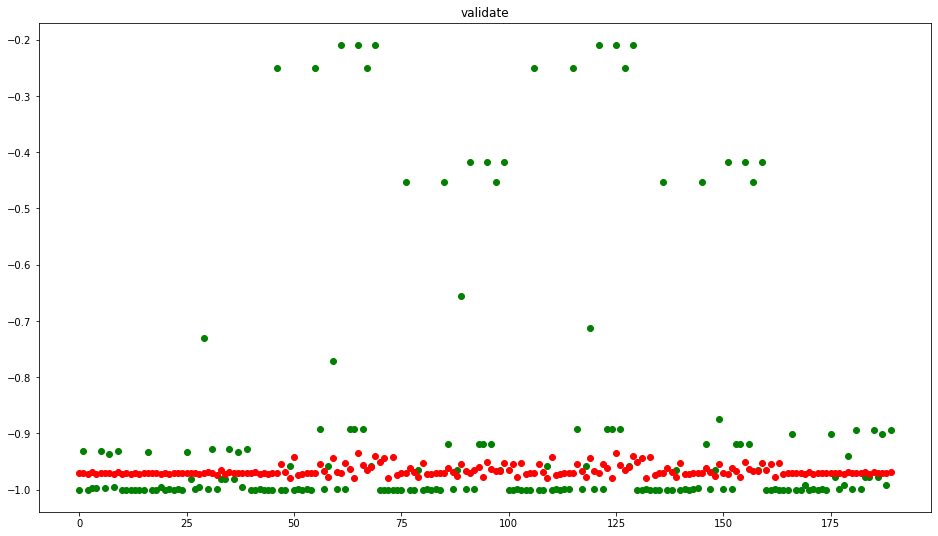

In [512]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

Analisis:

Podemos observar que dentro de las primeras epochs (aproximadamente 2) notamos que el callback se activa ya que conseguimos la perdida que estamos dispuesto a asumir (considerendo el tamaño del dataset). 

un punto que podemos observar es que los valores outliers son los que afectan en mayor medida al modelo. 

Algunos puntos que podrían haber ayudado en el modelo podrian haber sido:  estructurar los features iniciales que fueron descartados (estas podrían ser procesadas utilizando expresiones regulares por ejemplo).